In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
H_Wildfires = pd.read_csv(r'..\data\Nov_10\Historical_Wildfires.csv')
H_Weather = pd.read_csv(r'..\data\Nov_10\HistoricalWeather.csv')
H_Weather_Fc = pd.read_csv(r'..\data\Nov_10\HistoricalWeatherForecasts.csv')
LandClass = pd.read_csv(r'..\data\Nov_10\LandClass.csv')
Vege = pd.read_csv(r'..\data\Nov_10\VegetationIndex.csv')

NameError: name 'pd' is not defined

In [3]:
# To run on Ubuntu:
H_Wildfires = pd.read_csv(r'../data/Nov_10/Historical_Wildfires.csv')
H_Weather = pd.read_csv(r'../data/Nov_10/HistoricalWeather.csv')
H_Weather_Fc = pd.read_csv(r'../data/Nov_10/HistoricalWeatherForecasts.csv')
LandClass = pd.read_csv(r'../data/Nov_10/LandClass.csv')
Vege = pd.read_csv(r'../data/Nov_10/VegetationIndex.csv')

In [3]:
H_Wildfires.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
Unit_info2 = {'Data':['Estimated fire Area', 'Brightness', 'Raditative Power'],
        'Unit':['km^2','K','MW']}
data_type2 = pd.DataFrame(Unit_info2)
data_type2.style.hide_index()

Data,Unit
Estimated fire Area,km^2
Brightness,K
Raditative Power,MW


In [5]:
H_Weather.head(8)

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,14.485785,35.878704,27.341182,18.562212
5,2005-01-01,NSW,WindSpeed,8.002343e+05,1.354448,7.670482,3.323550,0.850048
6,2005-01-01,NT,Precipitation,1.357561e+06,0.000000,315.266815,9.884958,546.059262
7,2005-01-01,NT,RelativeHumidity,1.357561e+06,14.558820,95.683342,61.494675,584.201131


In [6]:
Unit_info = {'Data':['Precipitation', 'Relative humidity', 'Soil water content', 'Solar radiation','Temperature','Wind speed'],
        'Unit':['mm/day','%','m^3','MJ/day','C','m/s']}
data_type = pd.DataFrame(Unit_info)
data_type.style.hide_index()

Data,Unit
Precipitation,mm/day
Relative humidity,%
Soil water content,m^3
Solar radiation,MJ/day
Temperature,C
Wind speed,m/s


Lead time: Difference between the time the forcast is for ''valid time'' and the time the forecast was made ''issue time'')

So, issue time = valid time - lead time

##### why no Precipitation & Soil water content here ?
: Precipitation will be available after July 2015

In [7]:
H_Weather_Fc.head(8)

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
0,2014-01-01,NSW,RelativeHumidity,5,8.037682e+05,7.482927,85.021118,28.223569,353.620815
1,2014-01-01,NSW,SolarRadiation,5,8.037682e+05,24.865765,33.557598,31.647308,2.276068
2,2014-01-01,NSW,Temperature,5,8.037682e+05,21.243755,36.929035,30.893523,17.918553
3,2014-01-01,NSW,WindSpeed,5,8.037682e+05,1.593531,6.989559,3.958822,1.334834
4,2014-01-01,NT,RelativeHumidity,5,1.349817e+06,14.796251,73.601479,39.799856,189.805002
5,2014-01-01,NT,SolarRadiation,5,1.349817e+06,18.851019,32.766205,28.016282,6.573279
6,2014-01-01,NT,Temperature,5,1.349817e+06,25.955570,39.907539,33.379110,6.605778
7,2014-01-01,NT,WindSpeed,5,1.349817e+06,1.192912,12.156700,4.740253,4.871655


In [8]:
H_Weather_Fc.Parameter.unique()

array(['RelativeHumidity', 'SolarRadiation', 'Temperature', 'WindSpeed',
       'Precipitation'], dtype=object)

There is obvious outlier at 2017-10-06

In [9]:
H_Weather_Fc[H_Weather_Fc.Date=='2017-10-06']

,Date,Region,Parameter,Lead time,count()[unit: km^2],min(),max(),mean(),variance()
100639,2017-10-06,NSW,Precipitation,5,8.037682e+05,0.000000,17.424505,0.147542,0.885459
100640,2017-10-06,NSW,Precipitation,10,8.037682e+05,0.000000,5.196585,0.419928,0.820959
100641,2017-10-06,NSW,Precipitation,15,7.725261e+05,250.288422,8210.618164,316.547930,290270.178084
100642,2017-10-06,NSW,RelativeHumidity,5,8.037682e+05,21.865715,97.436989,48.691228,284.283663
100643,2017-10-06,NSW,RelativeHumidity,10,8.037682e+05,24.730513,99.168449,66.204040,573.370274
...,...,...,...,...,...,...,...,...,...
100739,2017-10-06,WA,Temperature,10,2.542548e+06,10.918800,33.982826,26.265514,32.721216
100740,2017-10-06,WA,Temperature,15,2.542548e+06,8.435110,36.643944,26.317869,38.023123
100741,2017-10-06,WA,WindSpeed,5,2.542548e+06,2.448896,9.710284,6.179069,1.679758
100742,2017-10-06,WA,WindSpeed,10,2.542548e+06,0.481980,9.431306,5.861428,2.422428


##### Every Unit is '%'

In [10]:
LandClass

,Region,Shrubs,Herbaceous vegetation,Cultivated and managed vegetation/agriculture (cropland),Urban / built up,Bare / sparse vegetation,Permanent water bodies,Herbaceous wetland,"Closed forest, evergreen, broad leaf","Closed forest, deciduous broad leaf","Closed forest, unknown","Open forest, evergreen broad leaf","Open forest, deciduous broad leaf","Open forest, unknown definitions",Open sea
0,NSW,6.2,43.6,13.0,0.3,0.2,0.2,0.1,14.7,6.8,0.3,0.5,3.7,10.3,0.1
1,NT,18.1,48.9,0.1,0.0,0.4,0.1,0.1,1.0,7.7,0.1,0.1,13.6,9.3,0.5
2,QL,9.5,45.3,1.6,0.1,1.1,0.1,0.0,5.3,13.3,0.3,0.1,12.0,11.0,0.3
3,SA,24.1,54.8,5.8,0.1,4.8,1.2,0.1,0.3,1.3,0.1,0.1,1.4,5.3,0.6
4,TA,0.7,23.8,1.2,0.2,0.1,1.9,1.4,50.1,0.6,1.1,7.2,1.5,7.2,3.0
5,WA,31.3,43.5,5.6,0.0,1.0,0.4,0.0,1.2,2.4,0.2,0.1,4.8,8.7,0.8
6,VI,1.4,35.0,23.3,1.0,0.1,0.6,0.3,23.9,3.8,0.3,1.5,2.7,5.2,0.9


#### The row is monthly basis

##### A Vegetation Index (VI) is a spectral transformation of two or more bands designed to enhance the contribution of vegetation properties and allow reliable spatial and temporal inter-comparisons of terrestrial photosynthetic activity and canopy structural variations

In [11]:
Vege.head(13)

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
0,NSW,1/1/2005,0.349202,0.9972,-0.2,0.204862,0.041968
1,NSW,2/1/2005,0.357403,0.9772,-0.2,0.208673,0.043544
2,NSW,3/1/2005,0.354087,0.9750,-0.2,0.209450,0.043869
3,NSW,4/1/2005,0.347242,0.9904,-0.2,0.207307,0.042976
4,NSW,5/1/2005,0.345526,0.9972,-0.2,0.202858,0.041151
5,NSW,6/1/2005,0.399652,0.9602,-0.2,0.188570,0.035559
6,NSW,7/1/2005,0.451143,0.9555,-0.2,0.174267,0.030369
7,NSW,8/1/2005,0.498218,0.9782,-0.2,0.181103,0.032798
8,NSW,9/1/2005,0.505553,0.9805,-0.2,0.204202,0.041698
9,NSW,10/1/2005,0.439443,0.9814,-0.2,0.214671,0.046084


In [12]:
Vege.tail()

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
1325,WA,6/1/2020,0.263760,0.9886,-0.2,0.129103,0.016667
1326,WA,7/1/2020,0.265321,0.9941,-0.2,0.148663,0.022101
1327,WA,8/1/2020,0.255785,0.9692,-0.2,0.155347,0.024133
1328,WA,9/1/2020,0.234510,0.9849,-0.2,0.126898,0.016103
1329,WA,10/1/2020,0.213640,0.9782,-0.2,0.099860,0.009972


In [13]:
H_Wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [14]:
from scipy.stats import norm

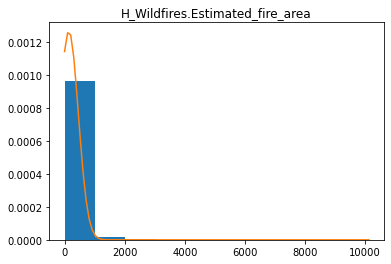

In [15]:
plt.hist(H_Wildfires.Estimated_fire_area, density=True)
mean,std = norm.fit (H_Wildfires.Estimated_fire_area)
x = np.linspace(H_Wildfires.Estimated_fire_area.min(),H_Wildfires.Estimated_fire_area.max(),100)
y = norm.pdf(x, mean, std)
plt.plot(x,y)
plt.title('H_Wildfires.Estimated_fire_area')
plt.show()

#### It is reasonable that large area is affected by fire.

In [16]:
H_Wildfires.Estimated_fire_area.nlargest(10)

6706     10120.943170
23537     8451.287070
23538     6761.264876
25356     6203.754148
23536     6025.035206
6707      5818.988535
23535     5722.408968
4337      5183.713045
6709      5035.357648
6717      4997.535176
Name: Estimated_fire_area, dtype: float64

### Doubts on 24/Nov/2020 by Huijo

1. How to deal with 'Date' Format?
2. How to use different source of input data
3. Is it right to feed all input such as confidence of Mean/Std/Var
4. What is replaced in the History of Wildfires?
5. Should we split input based on Region and train them separately?
\n~~6. What is the purpose of History of weather forcast and why there are only 4 parameters?
    ☞ If this is only prediction, why there is statistic values, sucah as min, max, mean, var?~~


In [17]:
H_Wildfires.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

#### There are null values in Std_confidence & Var_confidence column

In [18]:
H_Wildfires_Null = []
for i in H_Wildfires.columns:
    if H_Wildfires[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        H_Wildfires_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',H_Wildfires_Null)

No Null in Region column
No Null in Date column
No Null in Estimated_fire_area column
No Null in Mean_estimated_fire_brightness column
No Null in Mean_estimated_fire_radiative_power column
No Null in Mean_confidence column
There is null in Std_confidence column
There is null in Var_confidence column
No Null in Count column
No Null in Replaced column
Columns with null: ['Std_confidence', 'Var_confidence']


In [19]:
H_Wildfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
Region                                 26406 non-null object
Date                                   26406 non-null object
Estimated_fire_area                    26406 non-null float64
Mean_estimated_fire_brightness         26406 non-null float64
Mean_estimated_fire_radiative_power    26406 non-null float64
Mean_confidence                        26406 non-null float64
Std_confidence                         24199 non-null float64
Var_confidence                         24199 non-null float64
Count                                  26406 non-null int64
Replaced                               26406 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


#### If Std is null, Var is also null

In [20]:
H_Wildfires['Std_confidence'][H_Wildfires['Std_confidence']==False]

96       0.0
185      0.0
231      0.0
239      0.0
272      0.0
        ... 
21192    0.0
23076    0.0
23675    0.0
23999    0.0
24706    0.0
Name: Std_confidence, Length: 181, dtype: float64

In [21]:
H_Wildfires['Var_confidence'][H_Wildfires['Var_confidence']==False]

96       0.0
185      0.0
231      0.0
239      0.0
272      0.0
        ... 
21192    0.0
23076    0.0
23675    0.0
23999    0.0
24706    0.0
Name: Var_confidence, Length: 181, dtype: float64

### Delete rows with zero confidence

In [22]:
H_Wildfires2=H_Wildfires.copy()

In [39]:
H_Wildfires.dropna() 

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R
...,...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11,N
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16,N
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39,N
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38,N


In [24]:
H_Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242781 entries, 0 to 242780
Data columns (total 8 columns):
Date                   242781 non-null object
Region                 242781 non-null object
Parameter              242781 non-null object
count()[unit: km^2]    242781 non-null float64
min()                  242781 non-null float64
max()                  242781 non-null float64
mean()                 242781 non-null float64
variance()             242781 non-null float64
dtypes: float64(5), object(3)
memory usage: 14.8+ MB


In [25]:
H_Weather_Null = []
for i in H_Weather.columns:
    if H_Weather[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        H_Weather_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',H_Weather_Null)

No Null in Date column
No Null in Region column
No Null in Parameter column
No Null in count()[unit: km^2] column
No Null in min() column
No Null in max() column
No Null in mean() column
No Null in variance() column
Columns with null: []


In [26]:
H_Weather_Fc_Null = []
for i in H_Weather_Fc.columns:
    if H_Weather_Fc[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        H_Weather_Fc_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',H_Weather_Fc_Null)

No Null in Date column
No Null in Region column
No Null in Parameter column
No Null in Lead time column
No Null in count()[unit: km^2] column
No Null in min() column
No Null in max() column
No Null in mean() column
No Null in variance() column
Columns with null: []


In [27]:
Vege_Null = []
for i in Vege.columns:
    if Vege[i].isnull().sum() != 0:
        print('There is null in {} column'.format(i))
        Vege_Null.append(i)
    else:
        print('No Null in {} column'.format(i))
print('Columns with null:',Vege_Null)

No Null in Region column
No Null in Date column
No Null in Vegetation_index_mean column
No Null in Vegetation_index_max column
No Null in Vegetation_index_min column
No Null in Vegetation_index_std column
No Null in Vegetation_index_variance column
Columns with null: []


In [28]:
H_Wildfires.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [29]:
H_Wildfires.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [30]:
H_Wildfires.dtypes[H_Wildfires.dtypes!=object].index

Index(['Estimated_fire_area', 'Mean_estimated_fire_brightness',
       'Mean_estimated_fire_radiative_power', 'Mean_confidence',
       'Std_confidence', 'Var_confidence', 'Count'],
      dtype='object')

In [31]:
H_Wildfires[H_Wildfires.dtypes[H_Wildfires.dtypes!=object].index]

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count
0,8.680000,312.266667,42.400000,78.666667,2.886751,8.333333,3
1,16.611250,322.475000,62.362500,85.500000,8.088793,65.428571,8
2,5.520000,325.266667,38.400000,78.333333,3.214550,10.333333,3
3,6.264000,313.870000,33.800000,92.200000,7.529940,56.700000,5
4,5.400000,337.383333,122.533333,91.000000,7.937254,63.000000,3
...,...,...,...,...,...,...,...
26401,32.970000,324.068182,103.318182,84.363636,5.277741,27.854545,11
26402,20.840625,314.425000,37.256250,88.312500,8.121730,65.962500,16
26403,136.083077,323.588461,294.102564,92.974359,8.282789,68.604588,39
26404,42.397895,324.205263,54.994737,89.631579,8.461107,71.590327,38


#### one of two input will be necessary in Std&Var to improve computation
I will keep Var and discard Std

In [38]:
(H_Wildfires.Var_confidence-H_Wildfires.Std_confidence**2).sum()

-1.218847339584661e-07

In [43]:
H_Wildfires.drop(columns='Std_confidence')

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.680000,312.266667,42.400000,78.666667,8.333333,3,R
1,NSW,1/5/2005,16.611250,322.475000,62.362500,85.500000,65.428571,8,R
2,NSW,1/6/2005,5.520000,325.266667,38.400000,78.333333,10.333333,3,R
3,NSW,1/7/2005,6.264000,313.870000,33.800000,92.200000,56.700000,5,R
4,NSW,1/8/2005,5.400000,337.383333,122.533333,91.000000,63.000000,3,R
...,...,...,...,...,...,...,...,...,...
26401,WA,10/27/2020,32.970000,324.068182,103.318182,84.363636,27.854545,11,N
26402,WA,10/28/2020,20.840625,314.425000,37.256250,88.312500,65.962500,16,N
26403,WA,10/29/2020,136.083077,323.588461,294.102564,92.974359,68.604588,39,N
26404,WA,10/30/2020,42.397895,324.205263,54.994737,89.631579,71.590327,38,N


### Data distribution of History of Wildfires

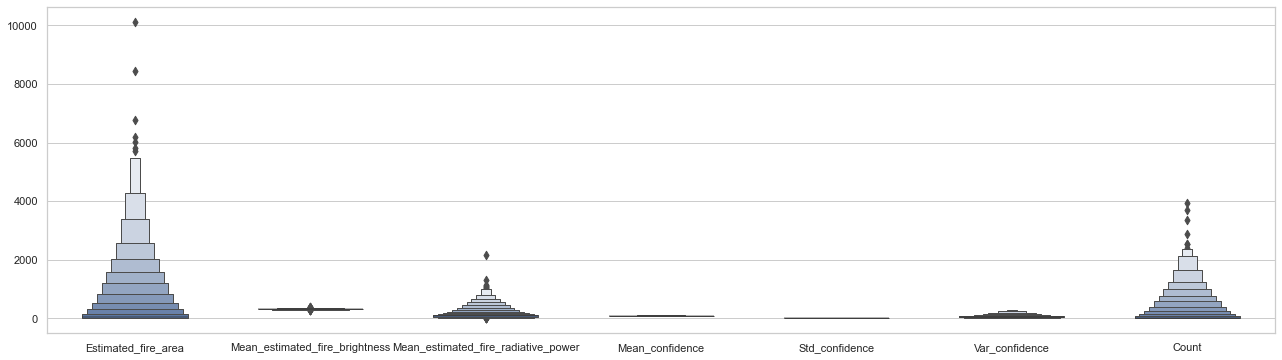

In [33]:
from seaborn import set_theme
sns.set_theme(style="whitegrid")
plt.figure(figsize=(22, 6))
sns.boxenplot(color="b", order=list(H_Wildfires.columns[H_Wildfires.dtypes != object]),
              scale="linear", saturation=0.7, 
    width=0.6,data=H_Wildfires[H_Wildfires.dtypes[H_Wildfires.dtypes != object].index])

## Target of Prediction

In [34]:
Sample = pd.read_csv(r'..\data\submission-example.csv')
Sample

,Region,Date,Estimated_fire_area
0,NWS,1-Feb,25.138971
1,NWS,2-Feb,131.277615
2,NWS,3-Feb,16.896662
3,NWS,4-Feb,30.512019
4,NWS,5-Feb,16.888861
...,...,...,...
191,WA,24-Feb,19746.548770
192,WA,25-Feb,1756.130410
193,WA,26-Feb,26212.876470
194,WA,27-Feb,5755.467588


In [35]:
H_Weather.tail(8)

,Date,Region,Parameter,count()[unit: km^2],min(),max(),mean(),variance()
242773,2020-10-31,VI,Temperature,2.294532e+05,9.186510,17.307510,13.167147,4.088503
242774,2020-10-31,VI,WindSpeed,2.294532e+05,1.783996,6.605598,3.838360,1.019079
242775,2020-10-31,WA,Precipitation,2.528546e+06,0.000000,15.154541,0.328437,2.097161
242776,2020-10-31,WA,RelativeHumidity,2.528546e+06,9.272744,82.022224,34.193973,309.018764
242777,2020-10-31,WA,SoilWaterContent,2.528546e+06,0.000000,0.285399,0.050737,0.001419
242778,2020-10-31,WA,SolarRadiation,2.528546e+06,17.072290,29.743744,26.746413,5.986063
242779,2020-10-31,WA,Temperature,2.528546e+06,16.238239,34.669132,28.090392,15.293953
242780,2020-10-31,WA,WindSpeed,2.528546e+06,1.704024,9.031948,4.373947,1.873607


### Therefore, the model should predict the estimated fire area of the future (Feb/2021), based on the data until Oct/2020.

In [49]:
target = H_Wildfires[['Date','Estimated_fire_area']]
target

,Date,Estimated_fire_area
0,1/4/2005,8.680000
1,1/5/2005,16.611250
2,1/6/2005,5.520000
3,1/7/2005,6.264000
4,1/8/2005,5.400000
...,...,...
26401,10/27/2020,32.970000
26402,10/28/2020,20.840625
26403,10/29/2020,136.083077
26404,10/30/2020,42.397895


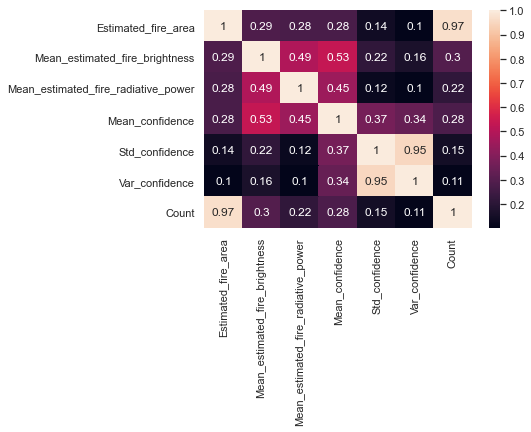

In [51]:
corrMatrix = H_Wildfires.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Estimated fire area has very strong correlation with count.
I guess when there is huge fire, the number of count is large.
However nothing significant info.

### To Do List: check the correlation between Estimated fire area and the 6 values in HistoricalWeather

### Reorganizing Historical Weather Data and Weather Forecast Data

In [5]:
def reform(df, target_column, common_cols, key_cols, param_cols):
    elements = df[target_column].unique()
    basis = df[common_cols].drop_duplicates()
    for elm in elements:
        new = df[df[target_column] == elm][key_cols + param_cols]
        rename = {}
        for col in param_cols:
            rename[col] = str(elm) + '_' + col
        new = new.rename(columns=rename)
        basis = basis.merge(new, on=key_cols)
    return basis

In [6]:
target_column = 'Parameter'
common_cols = ['Date', 'Region', 'count()[unit: km^2]']
common_cols_fc = ['Date', 'Region', 'Lead time', 'count()[unit: km^2]']
key_cols = ['Date', 'Region']
key_cols_fc = ['Date', 'Region', 'Lead time']
param_cols = ['min()', 'max()', 'mean()', 'variance()']

H_Weather_reform = reform(H_Weather.copy(), target_column, common_cols, key_cols, param_cols)
H_Weather_Fc_reform = reform(H_Weather_Fc.copy(), target_column, common_cols_fc, key_cols_fc, param_cols)

In [7]:
H_Weather_reform.head()

,Date,Region,count()[unit: km^2],Precipitation_min(),Precipitation_max(),Precipitation_mean(),Precipitation_variance(),RelativeHumidity_min(),RelativeHumidity_max(),RelativeHumidity_mean(),...,SolarRadiation_mean(),SolarRadiation_variance(),Temperature_min(),Temperature_max(),Temperature_mean(),Temperature_variance(),WindSpeed_min(),WindSpeed_max(),WindSpeed_mean(),WindSpeed_variance()
0,2005-01-01,NSW,8.002343e+05,0.000000,1.836935,0.044274,0.028362,13.877194,80.522964,36.355567,...,26.749389,6.078587,14.485785,35.878704,27.341182,18.562212,1.354448,7.670482,3.323550,0.850048
1,2005-01-01,NT,1.357561e+06,0.000000,315.266815,9.884958,546.059262,14.558820,95.683342,61.494675,...,19.781791,58.942658,24.179960,38.136787,29.881492,12.920252,1.840394,9.704402,5.296892,1.930014
2,2005-01-01,QL,1.730605e+06,0.000000,74.452164,1.453053,35.641257,14.443199,95.898270,47.959364,...,27.056979,29.500832,20.951620,37.047943,28.842866,13.792599,1.106028,7.675632,3.483753,0.883048
3,2005-01-01,SA,9.913151e+05,0.000000,3.193624,0.059078,0.042837,10.618136,81.980751,30.057683,...,27.142643,7.914246,14.095855,38.326847,30.793675,34.799336,2.023657,10.044715,4.657538,1.655908
4,2005-01-01,TA,6.778526e+04,0.003973,13.604791,3.099497,12.068597,43.906574,81.501442,65.086764,...,26.755711,12.826400,6.686816,16.228510,11.788805,4.912013,1.995647,11.432408,5.408138,2.963118


In [8]:
H_Weather_Fc_reform.head()

,Date,Region,Lead time,count()[unit: km^2],RelativeHumidity_min(),RelativeHumidity_max(),RelativeHumidity_mean(),RelativeHumidity_variance(),SolarRadiation_min(),SolarRadiation_max(),...,Temperature_mean(),Temperature_variance(),WindSpeed_min(),WindSpeed_max(),WindSpeed_mean(),WindSpeed_variance(),Precipitation_min(),Precipitation_max(),Precipitation_mean(),Precipitation_variance()
0,2015-07-06,NSW,5,8.037682e+05,36.506927,96.380577,62.832873,144.521980,1.310407,14.294098,...,10.280841,5.677777,1.183472,7.471239,3.541415,1.095084,0.000000,0.676588,0.015649,0.004120
1,2015-07-06,NT,5,1.349817e+06,22.928360,75.619980,40.378507,144.540934,8.691142,20.307533,...,18.207019,14.549913,1.600128,9.407453,3.861081,1.025623,0.000000,1.775728,0.017325,0.012745
2,2015-07-06,QL,5,1.736319e+06,30.285908,92.607628,55.704695,198.310702,7.298058,19.379251,...,17.935421,10.532778,0.594453,10.151658,3.091880,1.250189,0.000000,2.001911,0.054568,0.027684
3,2015-07-06,SA,5,9.797103e+05,29.739246,91.356522,59.212892,215.685550,3.959972,15.410563,...,13.257703,2.698994,1.065457,7.469995,3.159766,0.844959,0.000000,4.364864,0.165038,0.150157
4,2015-07-06,TA,5,6.567142e+04,71.484756,94.721146,85.190403,38.829059,0.742585,5.149638,...,5.788967,4.412144,2.463978,12.996228,5.260194,3.433708,0.847536,14.824793,4.985277,13.149893


In [9]:
target_column = 'Lead time'
common_cols_fc = ['Date', 'Region', 'count()[unit: km^2]']
key_cols_fc = ['Date', 'Region']
param_cols = ['RelativeHumidity_min()', 'RelativeHumidity_max()',
       'RelativeHumidity_mean()', 'RelativeHumidity_variance()',
       'SolarRadiation_min()', 'SolarRadiation_max()', 'SolarRadiation_mean()',
       'SolarRadiation_variance()', 'Temperature_min()', 'Temperature_max()',
       'Temperature_mean()', 'Temperature_variance()', 'WindSpeed_min()',
       'WindSpeed_max()', 'WindSpeed_mean()', 'WindSpeed_variance()',
       'Precipitation_min()', 'Precipitation_max()', 'Precipitation_mean()',
       'Precipitation_variance()']
H_Weather_Fc_reform_LeadTime = reform(H_Weather_Fc_reform.copy(), target_column, common_cols_fc, key_cols_fc, param_cols)

In [10]:
H_Weather_Fc_reform_LeadTime.head()

,Date,Region,count()[unit: km^2],5_RelativeHumidity_min(),5_RelativeHumidity_max(),5_RelativeHumidity_mean(),5_RelativeHumidity_variance(),5_SolarRadiation_min(),5_SolarRadiation_max(),5_SolarRadiation_mean(),...,15_Temperature_mean(),15_Temperature_variance(),15_WindSpeed_min(),15_WindSpeed_max(),15_WindSpeed_mean(),15_WindSpeed_variance(),15_Precipitation_min(),15_Precipitation_max(),15_Precipitation_mean(),15_Precipitation_variance()
0,2015-07-16,NSW,8.037682e+05,53.922024,96.653831,81.424096,89.258353,2.089505,14.138119,8.522660,...,10.347345,4.943718,0.999615,9.185587,4.047723,2.849608,0.00000,4.010015,0.607630,0.411440
1,2015-07-16,NT,1.349817e+06,24.189238,75.253464,40.484736,156.568747,12.434999,20.915419,18.380391,...,18.058505,15.796535,0.352656,8.476827,2.769054,2.174358,0.00000,0.438872,0.002135,0.000248
2,2015-07-16,QL,1.736319e+06,25.107180,90.107681,52.350346,290.605540,5.621719,20.479937,14.960178,...,15.666894,12.970920,0.456899,9.944665,2.497555,0.922299,0.00000,0.672407,0.015050,0.002931
3,2015-07-16,SA,9.797103e+05,44.000698,94.996590,67.615530,105.616678,4.538943,15.715313,11.380811,...,13.521799,0.915549,3.079926,13.122737,7.717226,2.805654,0.00000,5.540538,0.534634,0.585572
4,2015-07-16,TA,6.567142e+04,65.954094,98.546303,88.703049,44.189550,0.982655,8.040900,4.134952,...,8.681971,4.072777,3.615515,13.881755,7.230085,5.788722,0.24407,14.415625,5.819416,20.954985



### Outliers Handling
Step1: Outliers analysis

plot log histogram of parameters which have datapoints larger or smaller than (mean+factor x std) or (mean-factor x std)

*the "factor" variable is adjustable*

look at the graphs and set outlier boundary of each parameters by human feeling(?)

*the boundary dictionary is adjustable*

Step2: Outliers filtering

automatic filter out outliers basing on the boundary dictionaries

In [11]:
def outlier_filter(df, outliers_bound):
    for col in outliers_bound:    
        if col in ignore_cols:
            continue
        if 'upper_bound' in outliers_bound[col]:
            df = df[df[col] < outliers_bound[col]['upper_bound']]
        if 'lower_bound' in outliers_bound[col]:
            df = df[df[col] > outliers_bound[col]['lower_bound']]
    return df

Precipitation_min()
mean =  0.03955214263918021  std =  0.3229063542091131
outliers count (too large):  338
outliers count (too small):  0


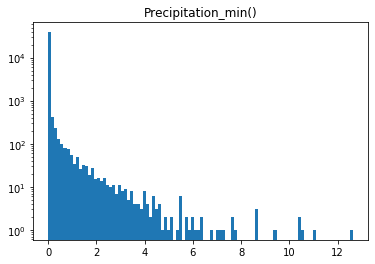

Precipitation_max()
mean =  17.791491607324524  std =  30.20811189517603
outliers count (too large):  556
outliers count (too small):  0


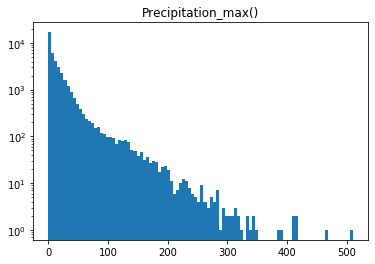

Precipitation_mean()
mean =  1.5373878979082625  std =  2.9849547670865357
outliers count (too large):  508
outliers count (too small):  0


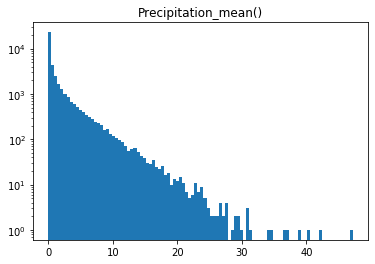

Precipitation_variance()
mean =  16.681189741896105  std =  62.725691308032175
outliers count (too large):  426
outliers count (too small):  0


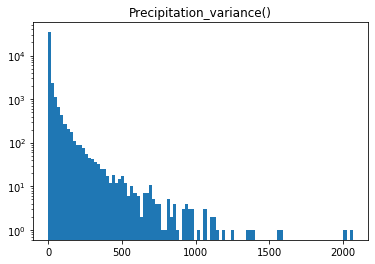

RelativeHumidity_max()
mean =  87.65776939692326  std =  6.437093770268821
outliers count (too large):  0
outliers count (too small):  8


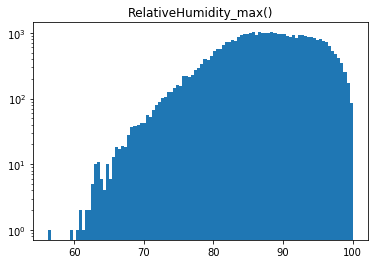

RelativeHumidity_variance()
mean =  196.2182331160756  std =  141.45318196701416
outliers count (too large):  75
outliers count (too small):  0


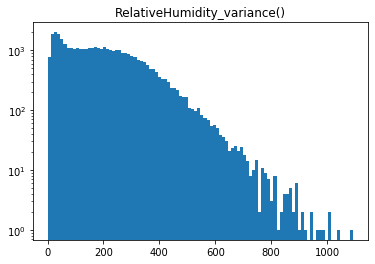

SoilWaterContent_min()
mean =  0.0018367662560240577  std =  0.0060464836003407
outliers count (too large):  711
outliers count (too small):  0


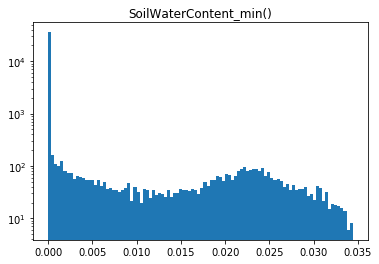

SoilWaterContent_variance()
mean =  0.006722972583570625  std =  0.0035927922826543444
outliers count (too large):  193
outliers count (too small):  0


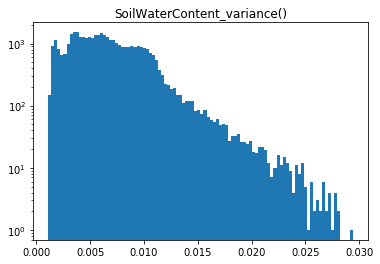

SolarRadiation_variance()
mean =  10.032778833867267  std =  11.348976322572035
outliers count (too large):  439
outliers count (too small):  0


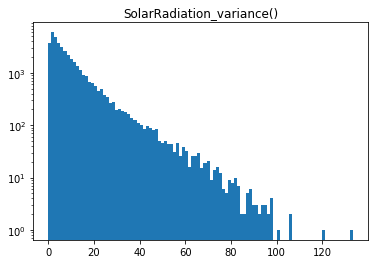

Temperature_variance()
mean =  10.131397536729908  std =  8.453135850825651
outliers count (too large):  178
outliers count (too small):  0


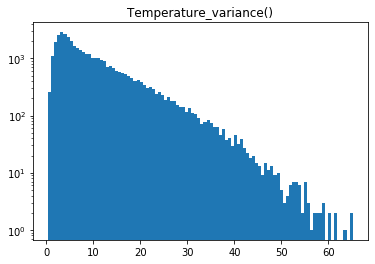

WindSpeed_min()
mean =  1.4817163287396893  std =  0.7122923272703828
outliers count (too large):  222
outliers count (too small):  0


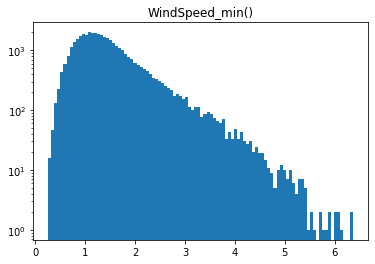

WindSpeed_max()
mean =  8.697807206592753  std =  2.339435853247682
outliers count (too large):  22
outliers count (too small):  0


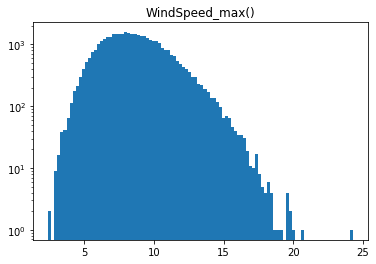

WindSpeed_mean()
mean =  3.7883925909585563  std =  1.045852605528004
outliers count (too large):  45
outliers count (too small):  0


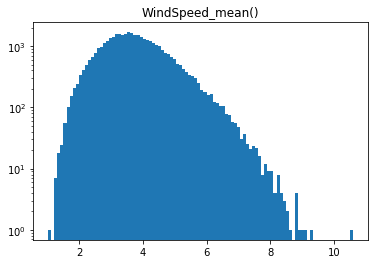

WindSpeed_variance()
mean =  1.3361771719660849  std =  0.9208039758170306
outliers count (too large):  225
outliers count (too small):  0


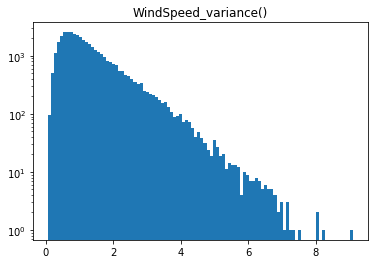

In [12]:
factor = 4
df = H_Weather_reform
ignore_cols = ['Date', 'Region', 'count()[unit: km^2]']

for col in df.columns:
    if col in ignore_cols:
        continue
    y = df[col]
    y_mean = np.mean(y)
    y_std = np.std(y)
    upper_bound = y_mean + factor*y_std
    lower_bound = y_mean - factor*y_std
    outlier_large = len(y[y>upper_bound])
    outlier_small = len(y[y<lower_bound])
    if outlier_large + outlier_small > 0:
        print(col)
        print('mean = ', y_mean, ' std = ', y_std)
        print('outliers count (too large): ', outlier_large)
        print('outliers count (too small): ', outlier_small)
        (n, _, _) = plt.hist(y, bins=100, log=True)
        plt.title(col)
        plt.show()

In [13]:
outliers_bound_weather = {
    'Precipitation_min()':{
        'upper_bound': 8
    },
    'Precipitation_max()':{
        'upper_bound': 350
    },
    'RelativeHumidity_max()':{
        'lower_bound': 59
    },
    'WindSpeed_max()':{
        'upper_bound': 23
    },
    'Precipitation_mean()':{
        'upper_bound': 32
    },
    'WindSpeed_mean()':{
        'upper_bound': 10
    },
    'Precipitation_variance()':{
        'upper_bound': 1500
    },
    'RelativeHumidity_variance()':{
        'upper_bound': 1050
    },
    'SolarRadiation_variance()':{
        'upper_bound': 1150
    },
    'WindSpeed_variance()':{
        'upper_bound': 9
    }
}

In [14]:
Weather_filtered = outlier_filter(H_Weather_reform.copy(), outliers_bound_weather)

5_RelativeHumidity_max()
mean =  85.56286618245818  std =  8.412604077436598
outliers count (too large):  0
outliers count (too small):  10


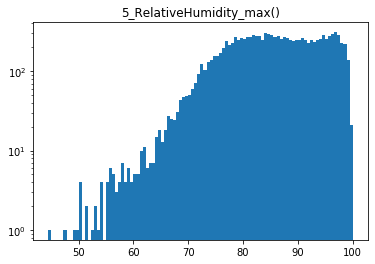

5_RelativeHumidity_variance()
mean =  197.85454695772174  std =  126.93505158535412
outliers count (too large):  18
outliers count (too small):  0


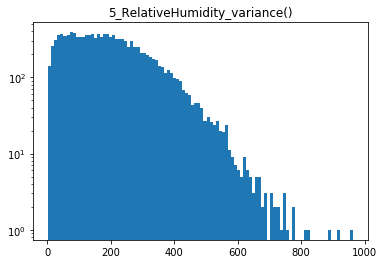

5_SolarRadiation_variance()
mean =  12.485164137164638  std =  13.437836302675402
outliers count (too large):  129
outliers count (too small):  0


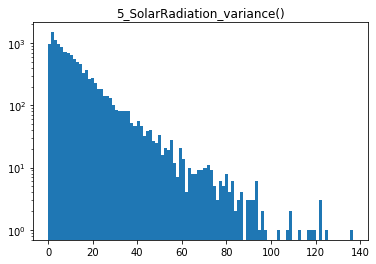

5_Temperature_variance()
mean =  11.542649622121885  std =  9.019070512136388
outliers count (too large):  58
outliers count (too small):  0


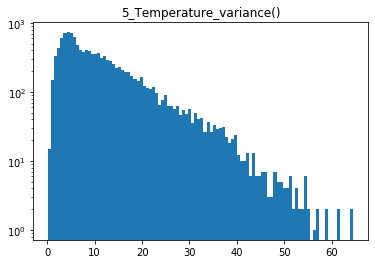

5_WindSpeed_min()
mean =  1.4617262652337173  std =  0.7501250455786342
outliers count (too large):  56
outliers count (too small):  0


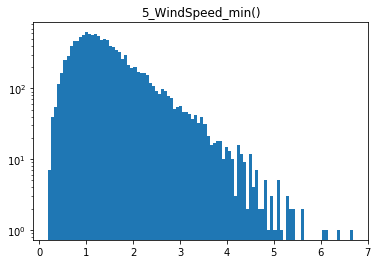

5_WindSpeed_max()
mean =  8.566482565630169  std =  2.3283552316045264
outliers count (too large):  18
outliers count (too small):  0


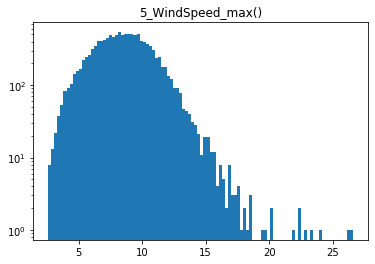

5_WindSpeed_mean()
mean =  4.384590522671328  std =  1.365494394002321
outliers count (too large):  2
outliers count (too small):  0


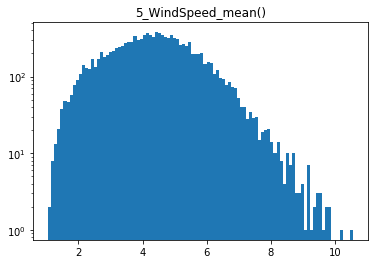

5_WindSpeed_variance()
mean =  1.9028294762334133  std =  1.2121301294227211
outliers count (too large):  69
outliers count (too small):  0


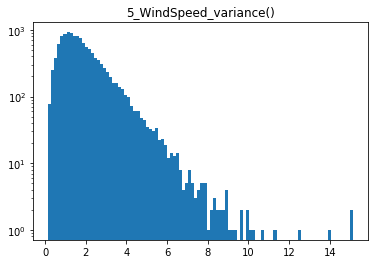

5_Precipitation_min()
mean =  0.03919799774754658  std =  0.26974131120788536
outliers count (too large):  125
outliers count (too small):  0


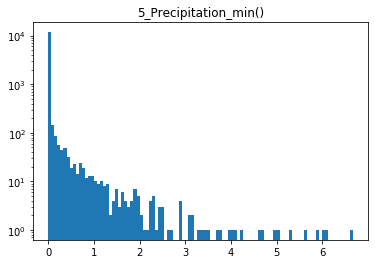

5_Precipitation_max()
mean =  17.523997998339997  std =  29.89052428980644
outliers count (too large):  131
outliers count (too small):  0


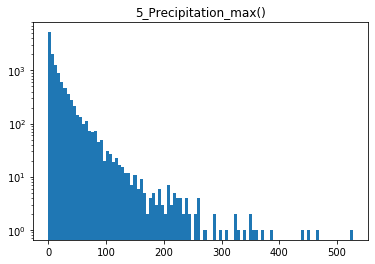

5_Precipitation_mean()
mean =  1.5193043902770882  std =  2.8058129697916105
outliers count (too large):  155
outliers count (too small):  0


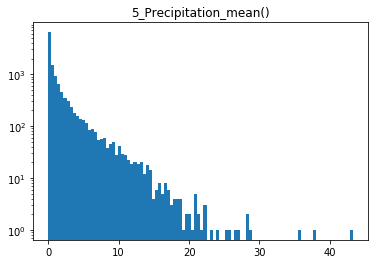

5_Precipitation_variance()
mean =  17.925728239790846  std =  70.8218895841602
outliers count (too large):  128
outliers count (too small):  0


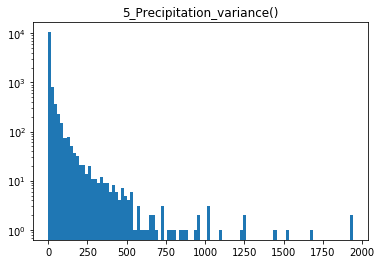

10_RelativeHumidity_max()
mean =  85.82526305836315  std =  8.629296220208314
outliers count (too large):  0
outliers count (too small):  16


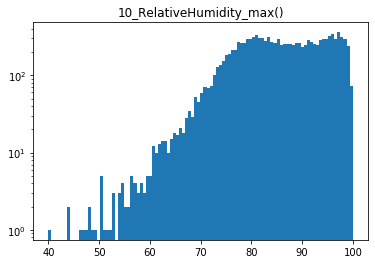

10_RelativeHumidity_variance()
mean =  198.2769136928806  std =  127.2328336197088
outliers count (too large):  14
outliers count (too small):  0


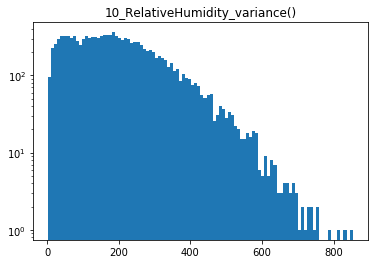

10_SolarRadiation_min()
mean =  9.924089225216477  std =  7.331379879736792
outliers count (too large):  19
outliers count (too small):  0


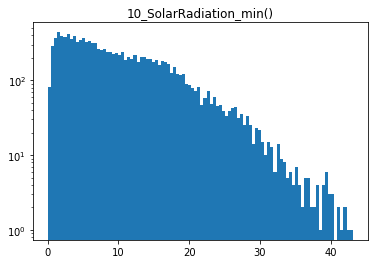

10_SolarRadiation_variance()
mean =  16.289074415967352  std =  18.891555757497763
outliers count (too large):  131
outliers count (too small):  0


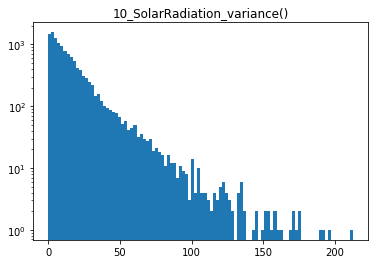

10_Temperature_variance()
mean =  11.630639372330544  std =  9.171737764658019
outliers count (too large):  62
outliers count (too small):  0


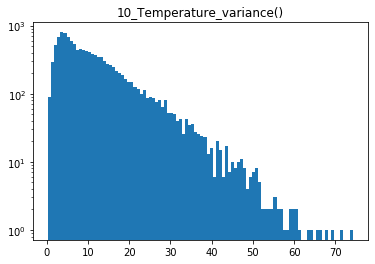

10_WindSpeed_min()
mean =  1.2193220586219826  std =  0.8257673754334345
outliers count (too large):  61
outliers count (too small):  0


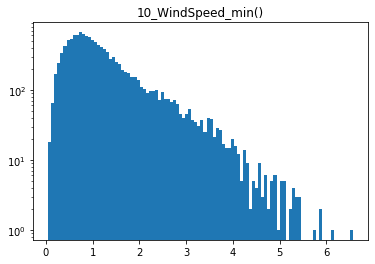

10_WindSpeed_max()
mean =  8.807639017393724  std =  2.4810539127216096
outliers count (too large):  24
outliers count (too small):  0


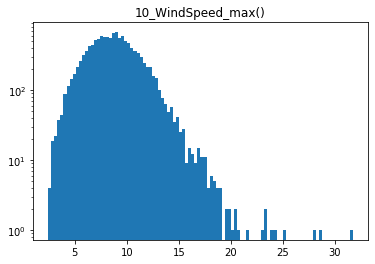

10_WindSpeed_mean()
mean =  4.3136495378119175  std =  1.342783058517581
outliers count (too large):  8
outliers count (too small):  0


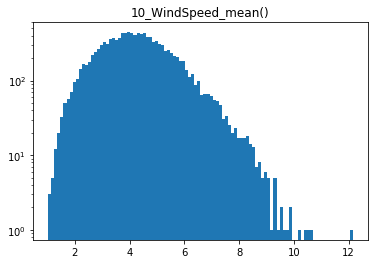

10_WindSpeed_variance()
mean =  2.089918864308493  std =  1.3930484397871814
outliers count (too large):  78
outliers count (too small):  0


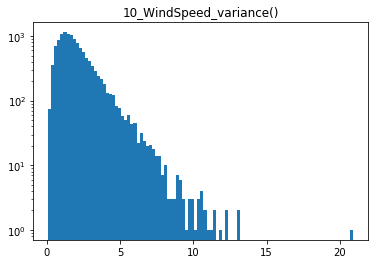

10_Precipitation_min()
mean =  0.040589932603939456  std =  0.32268263995844354
outliers count (too large):  94
outliers count (too small):  0


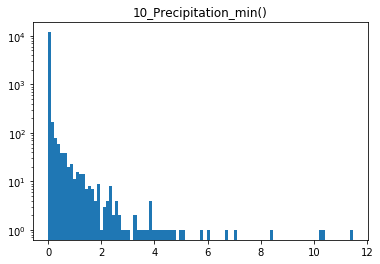

10_Precipitation_max()
mean =  16.213906467216347  std =  26.534688098965205
outliers count (too large):  125
outliers count (too small):  0


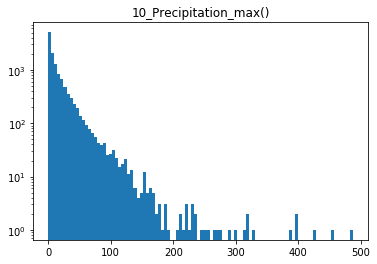

10_Precipitation_mean()
mean =  1.4904923333089843  std =  2.683573330951212
outliers count (too large):  152
outliers count (too small):  0


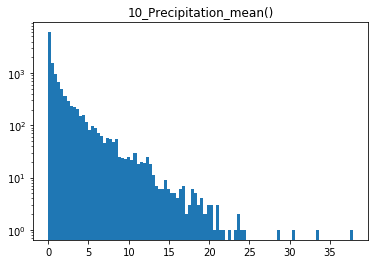

10_Precipitation_variance()
mean =  15.868537504191316  std =  65.01947746649634
outliers count (too large):  99
outliers count (too small):  0


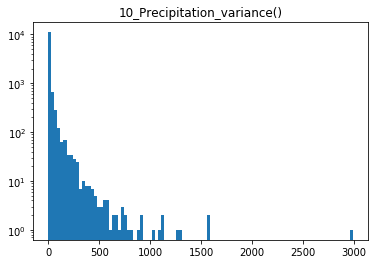

15_RelativeHumidity_max()
mean =  85.83759231947107  std =  8.566197899271263
outliers count (too large):  0
outliers count (too small):  8


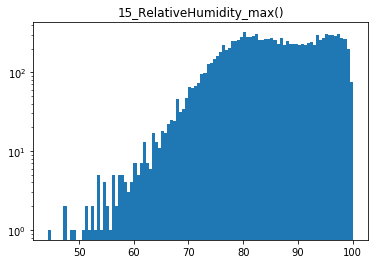

15_RelativeHumidity_variance()
mean =  198.29763505956285  std =  128.1576516967733
outliers count (too large):  18
outliers count (too small):  0


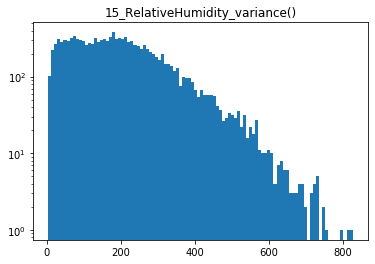

15_SolarRadiation_min()
mean =  9.740635542324767  std =  7.254135549880493
outliers count (too large):  12
outliers count (too small):  0


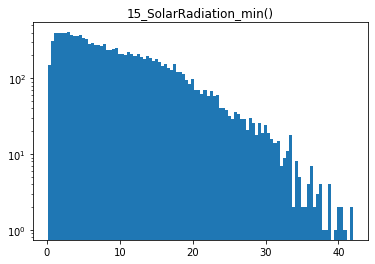

15_SolarRadiation_variance()
mean =  16.415928671519573  std =  18.499674983468722
outliers count (too large):  119
outliers count (too small):  0


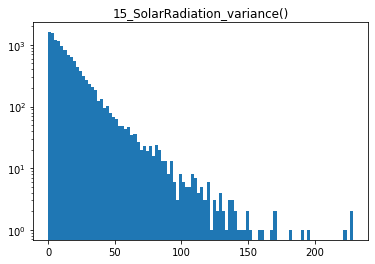

15_Temperature_variance()
mean =  11.699335297057  std =  9.321153847717298
outliers count (too large):  66
outliers count (too small):  0


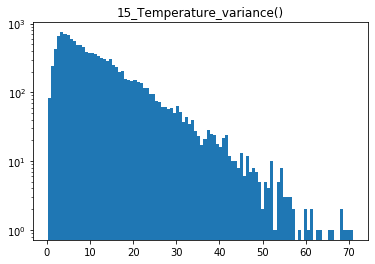

15_WindSpeed_min()
mean =  1.2067165460721336  std =  0.8292811507993553
outliers count (too large):  57
outliers count (too small):  0


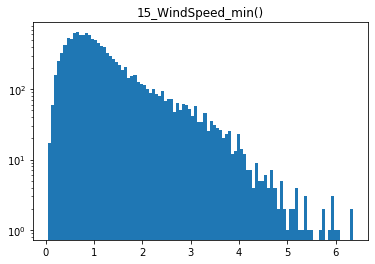

15_WindSpeed_max()
mean =  8.827726813086903  std =  2.4415233439594566
outliers count (too large):  20
outliers count (too small):  0


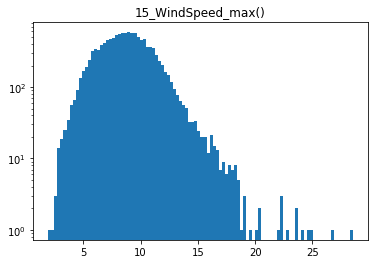

15_WindSpeed_mean()
mean =  4.328778251876586  std =  1.3640980276344992
outliers count (too large):  8
outliers count (too small):  0


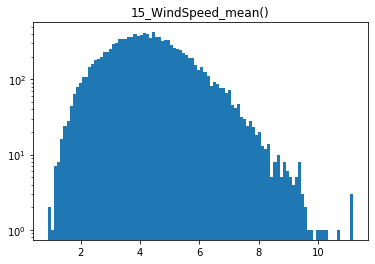

15_WindSpeed_variance()
mean =  2.138704162107919  std =  1.4284826823470007
outliers count (too large):  71
outliers count (too small):  0


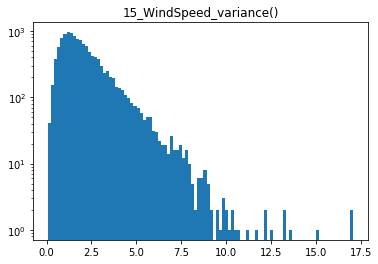

15_Precipitation_min()
mean =  0.4762218956703235  std =  10.578495499819184
outliers count (too large):  22
outliers count (too small):  0


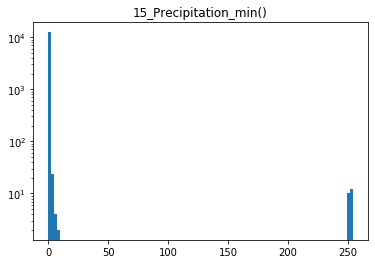

15_Precipitation_max()
mean =  30.96784485132403  std =  387.38612037273646
outliers count (too large):  20
outliers count (too small):  0


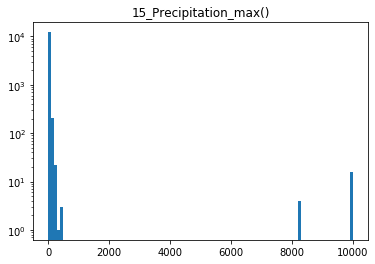

15_Precipitation_mean()
mean =  5.538347601096533  std =  122.34317399431283
outliers count (too large):  16
outliers count (too small):  0


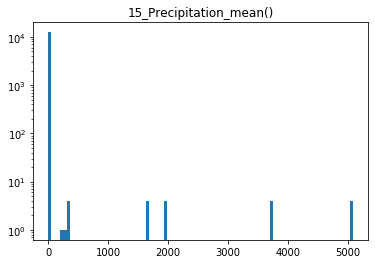

15_Precipitation_variance()
mean =  22201.40252002519  std =  645391.7225777303
outliers count (too large):  16
outliers count (too small):  0


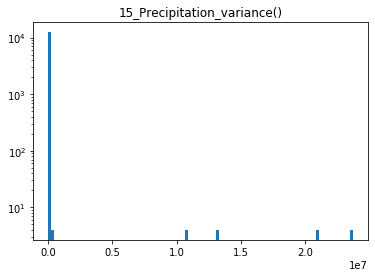

In [15]:
factor = 4
df = H_Weather_Fc_reform_LeadTime
ignore_cols = ['Date', 'Region', 'count()[unit: km^2]']

for col in df.columns:
    if col in ignore_cols:
        continue
    y = df[col]
    y_mean = np.mean(y)
    y_std = np.std(y)
    upper_bound = y_mean + factor*y_std
    lower_bound = y_mean - factor*y_std
    outlier_large = len(y[y>upper_bound])
    outlier_small = len(y[y<lower_bound])
    if outlier_large + outlier_small > 0:
        print(col)
        print('mean = ', y_mean, ' std = ', y_std)
        print('outliers count (too large): ', outlier_large)
        print('outliers count (too small): ', outlier_small)
        (n, _, _) = plt.hist(y, bins=100, log=True)
        plt.title(col)
        plt.show()

In [16]:
outliers_bound_forecast = {
    '5_RelativeHumidity_max()':{
        'lower_bound': 45
    },
    '5_RelativeHumidity_variance()':{
        'upper_bound': 850
    },
    '5_SolarRadiation_variance()':{
        'upper_bound': 130
    },
    '5_WindSpeed_min()':{
        'upper_bound': 6.5
    },
    '5_WindSpeed_max()':{
        'upper_bound': 25
    },
    '5_WindSpeed_mean()':{
        'upper_bound': 10
    },
    '5_WindSpeed_variance()':{
        'upper_bound': 12
    },
    '5_Precipitation_max()':{
        'upper_bound': 500
    },
    '5_Precipitation_mean()':{
        'upper_bound': 30
    },
    '5_Precipitation_variance()':{
        'upper_bound': 1300
    },
    '10_SolarRadiation_variance()':{
        'upper_bound': 200
    },
    '10_WindSpeed_max()':{
        'upper_bound': 26
    },
    '10_WindSpeed_mean()':{
        'upper_bound': 12
    },
    '10_WindSpeed_variance()':{
        'upper_bound': 20
    },
    '10_Precipitation_min()':{
        'upper_bound': 10
    },
    '10_Precipitation_mean()':{
        'upper_bound': 30
    },
    '10_Precipitation_variance()':{
        'upper_bound': 2000
    },
    '15_SolarRadiation_variance()':{
        'upper_bound': 200
    },
    '15_WindSpeed_max()':{
        'upper_bound': 25
    },
    '15_Precipitation_variance()':{
        'upper_bound': 200000
    }
}

In [17]:
Weather_Fc_filtered = outlier_filter(H_Weather_Fc_reform_LeadTime.copy(), outliers_bound_forecast)

Found it quite difficult to set the boundaries of outliers, but we can adjust it anytime we wish to.

"H_Weather_reform_filtered" and "H_Weather_Fc_reform_filtered" are the latest dataframes for weather history data and weather forecast data.